In [ ]:
# Aluno: Gustavo de Oliveira Rego Morais

## Trazendo o arquivo do google drive:


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import seaborn as sns

url = '/content/drive/MyDrive/desafio 5 - Ciência de dados - Relatório do Banco x.csv'

dados = pd.read_csv(url)

In [11]:
dados

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


## Substituindo o cabeçalho por palavras em letras maiúsculas

In [12]:
colunas = dados.columns
colunas

colunas_uppercase = [coluna.upper() for coluna in colunas]
colunas_uppercase

['ID',
 'PONTOS',
 'ESTADO',
 'GENERO',
 'IDADE',
 'BENS',
 'SALDO NA CONTA',
 'PRODUTO',
 'POSSUI CARTAO',
 'ATIVO',
 'SALARIO',
 'SAIU']

In [13]:
dados.rename(columns = {colunas[i] : colunas_uppercase[i] for i in range(len(colunas))}, inplace= True)
dados

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


### Eliminando os outliers de idade, atribuindo no lugar deles os valores adequados.

In [14]:
dados.describe()

,ID,PONTOS,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


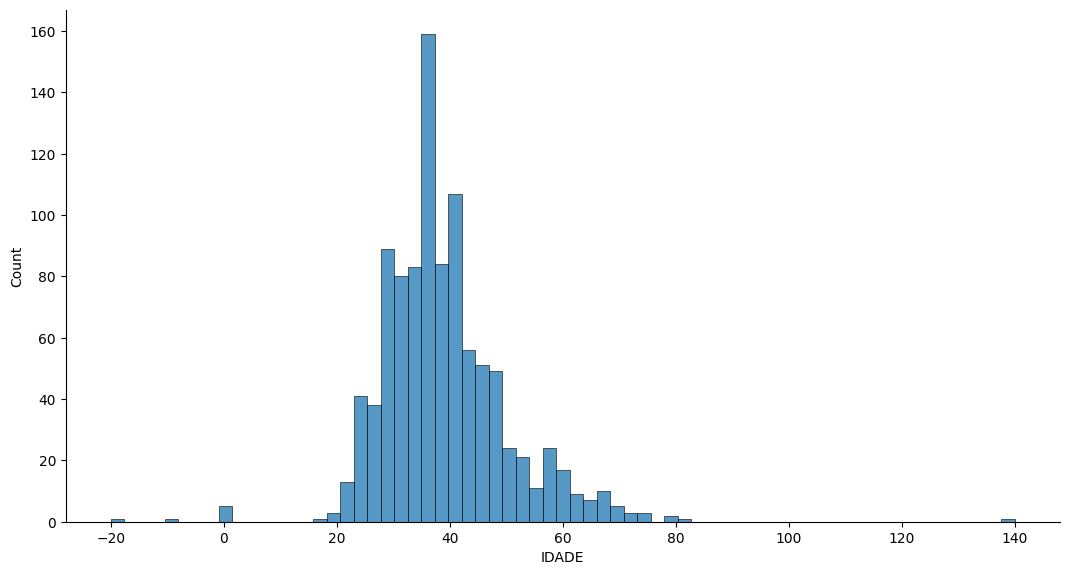

In [15]:
ax = sns.displot(dados['IDADE'], kde=False)
ax.figure.set_size_inches(12, 6)
ax;

In [16]:
selecao = (dados.IDADE < 18) | (dados.IDADE > 100)

dados[selecao].sort_values('IDADE')

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
984,986,773,MA,Masculino,-20,1,12453278,2,0,1,1172357.0,0
867,869,636,MA,Feminino,-10,1,17083346,1,1,0,11051028.0,1
851,853,667,CE,Feminino,0,1,9713392,2,0,0,11331677.0,1
887,889,585,MA,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,CE,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,CE,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,MA,Feminino,0,5,11859041,1,1,1,568417.0,1
990,992,655,MA,Masculino,140,5,93147,2,1,0,6621413.0,0


In [17]:
dados.drop(dados[selecao].index, inplace= True)

dados.shape

(991, 12)

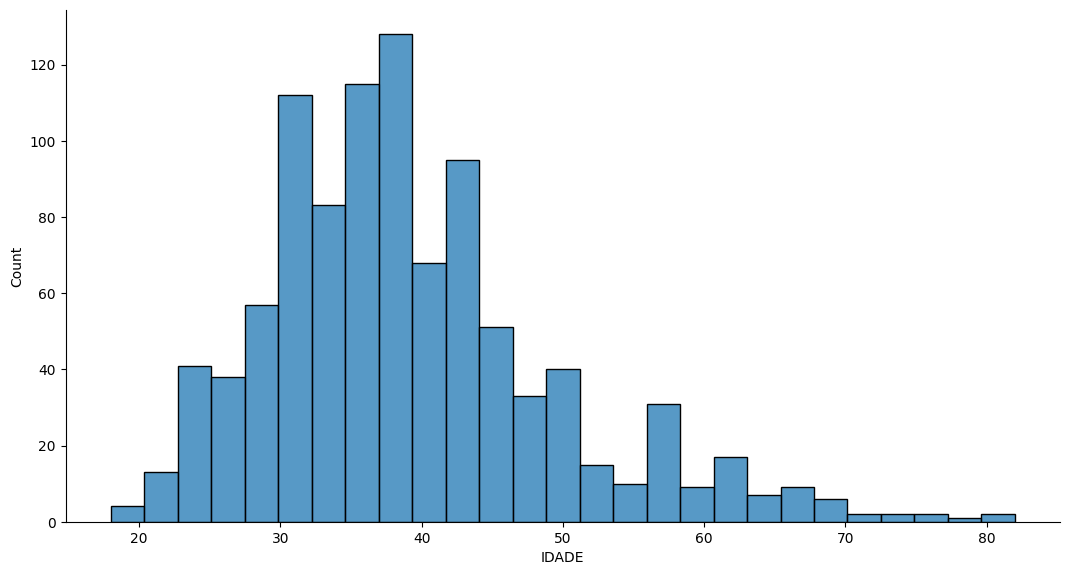

In [18]:
ax = sns.displot(dados['IDADE'], kde=False)
ax.figure.set_size_inches(12, 6)
ax;

Decidi remover os valores de idade abaixo de 18 anos e maiores 100 da base de dados

## Removendo os valores faltantes de gênero

In [19]:
dados.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            8
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

In [20]:
dados.dropna(subset=['GENERO'], inplace= True)

In [21]:
dados.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

### Padronizando as lacunas de genero para 'Masculino' e 'Feminino'


In [22]:
dados.GENERO.unique()

array(['Feminino', 'Masculino', 'M', 'F', 'Fem'], dtype=object)

In [23]:
generos = {
    'M' : 'Masculino',
    'F' : 'Feminino',
    'Fem': 'Feminino'
}

In [24]:
dados.GENERO.replace(generos, inplace= True)

In [25]:
dados['GENERO'].unique()

array(['Feminino', 'Masculino'], dtype=object)

## Identificando outliers no dataframe

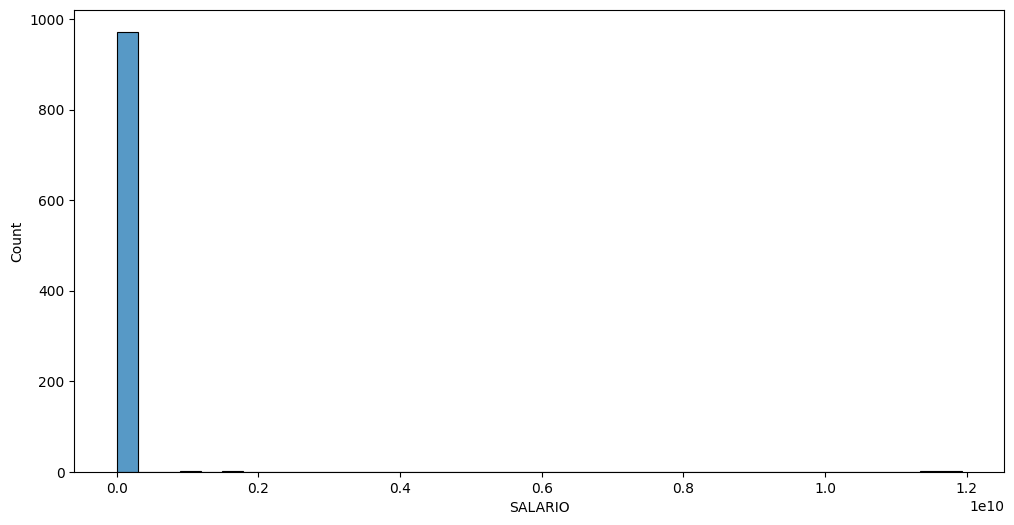

In [26]:
ax = sns.histplot(dados['SALARIO'], bins = 40)
ax.figure.set_size_inches(12, 6)
ax;

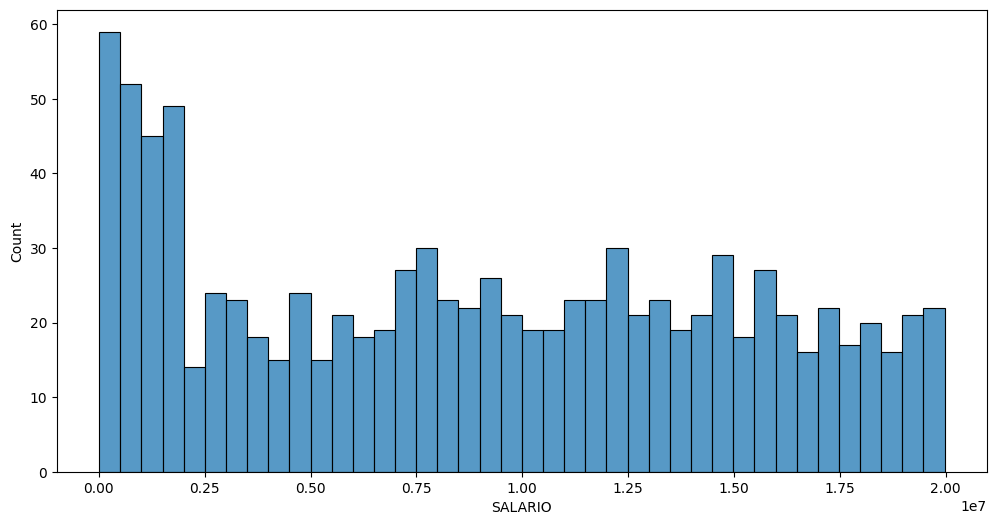

In [27]:
ax = sns.histplot(dados.query('SALARIO < 19972540')['SALARIO'], bins = 40)
ax.figure.set_size_inches(12, 6)
ax;

Fazendo uma análise na própria planilha percebe-se que há 4 individuos que possuem destoam dos demais e puxam os valores para cima

In [28]:
outliers_salario = dados.query('SALARIO > 199725400')

outliers_salario

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
7,8,376,CE,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,CE,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,MA,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,MA,Masculino,72,1,0,2,0,1,1.119812e+09,0


Podemos defini-los como outliers, irei remove-los do dataset original para não afetarem os valores restantes.

In [29]:
dados.drop(outliers_salario.index, inplace= True)

dados.shape

(979, 12)

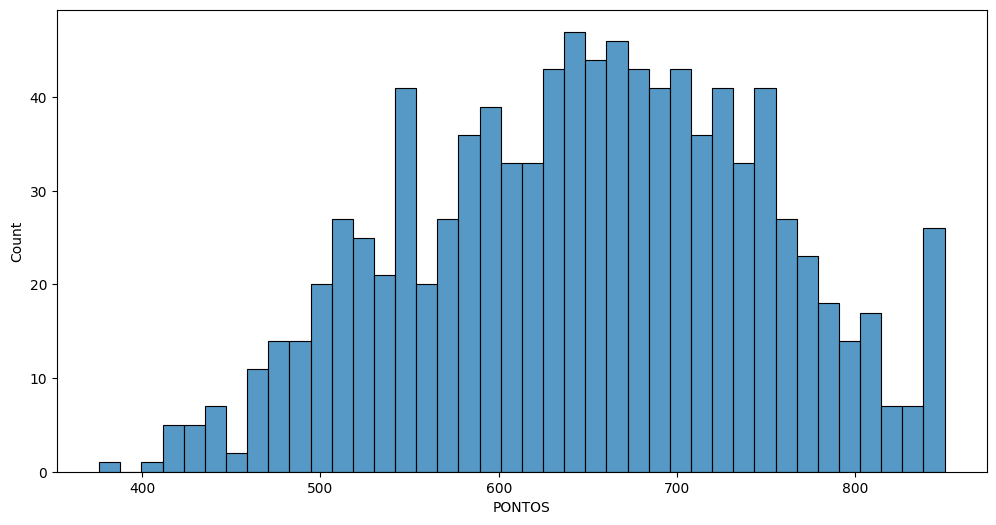

In [30]:
ax = sns.histplot(dados['PONTOS'], bins = 40)
ax.figure.set_size_inches(12, 6)
ax;

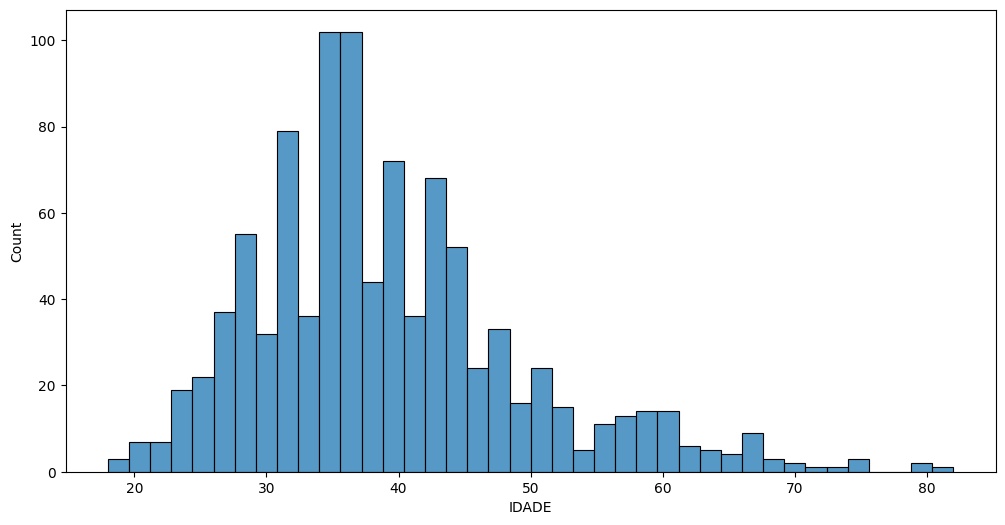

In [31]:
ax = sns.histplot(dados['IDADE'], bins = 40)
ax.figure.set_size_inches(12, 6)
ax;

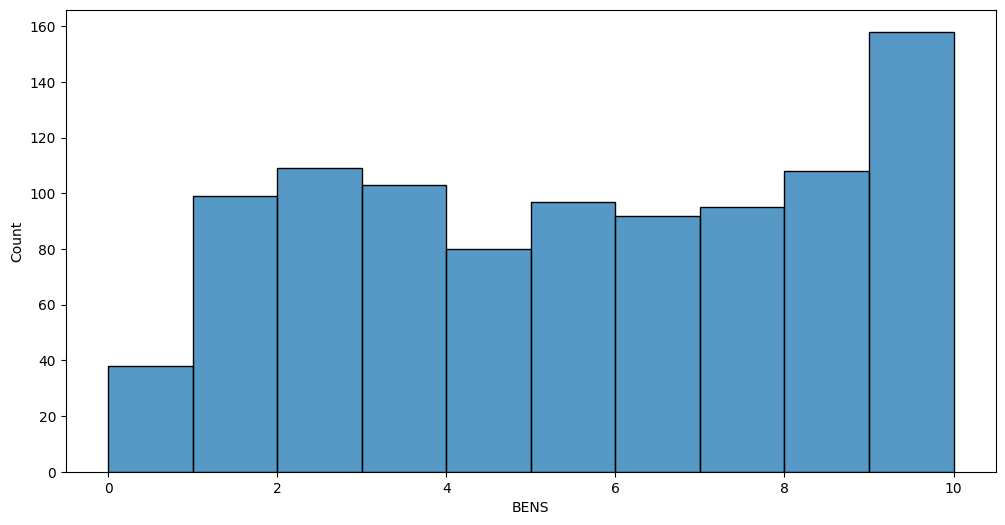

In [32]:
ax = sns.histplot(dados['BENS'], bins = 10)
ax.figure.set_size_inches(12, 6)
ax;

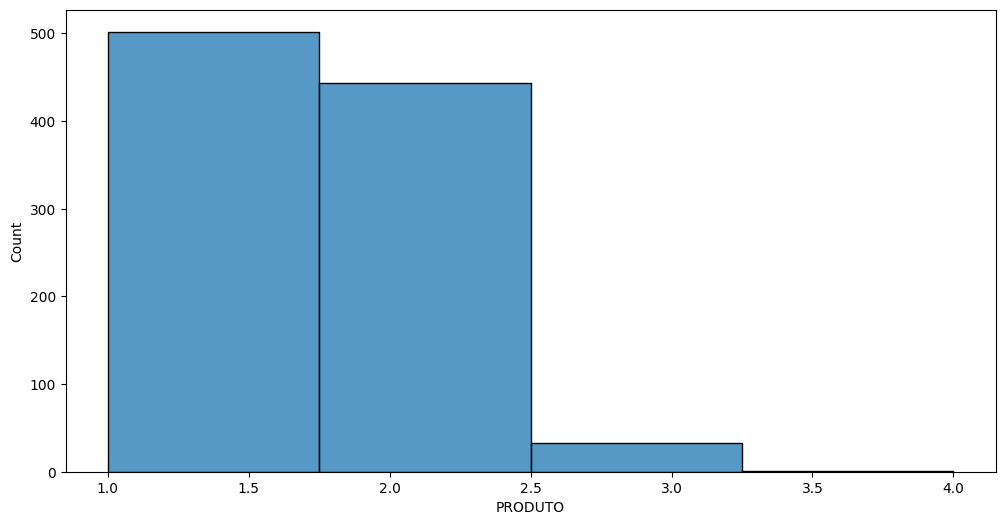

In [33]:
ax = sns.histplot(dados['PRODUTO'], bins= 4)
ax.figure.set_size_inches(12, 6)
ax;

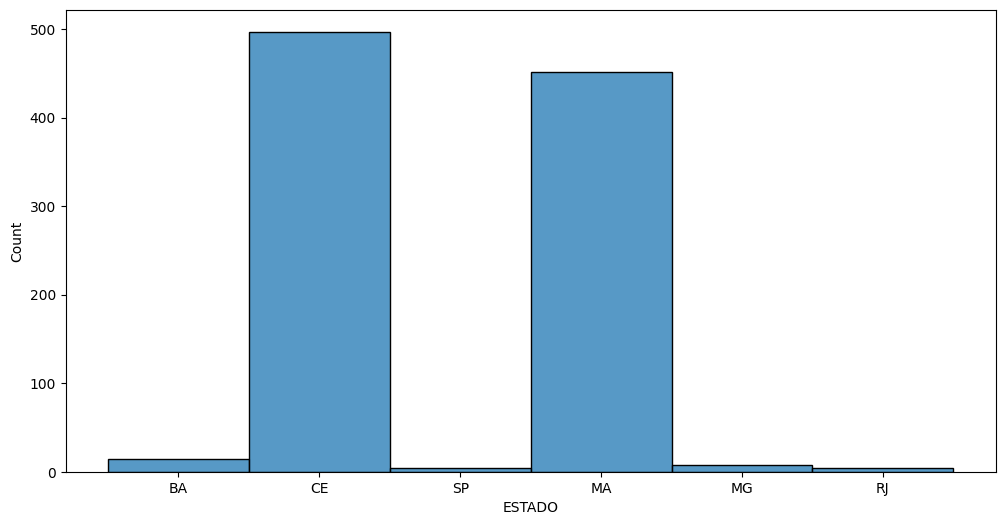

In [34]:
ax = sns.histplot(dados['ESTADO'])
ax.figure.set_size_inches(12, 6)
ax;

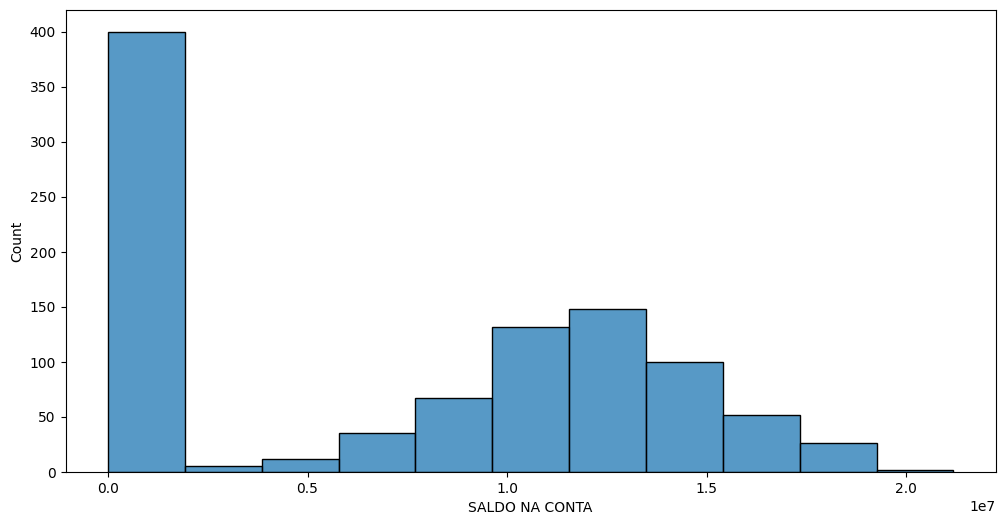

In [35]:
ax = sns.histplot(dados['SALDO NA CONTA'])
ax.figure.set_size_inches(12, 6)
ax;

Vendo todos os tipos de dados da tabela

In [36]:
dados.dtypes

ID                  int64
PONTOS              int64
ESTADO             object
GENERO             object
IDADE               int64
BENS                int64
SALDO NA CONTA      int64
PRODUTO             int64
POSSUI CARTAO       int64
ATIVO               int64
SALARIO           float64
SAIU                int64
dtype: object

In [37]:
dados.SALARIO.isna().sum()

7

## Preenchendo os valores faltantes de SALARIO com o valor médio

In [38]:
dados.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

In [39]:
dados.SALARIO.mean()

8900375.247942386

In [40]:
salario_medio = int(dados.SALARIO.mean().round())

salario_medio

8900375

In [41]:
dados.SALARIO.fillna(salario_medio, inplace= True)

In [42]:
dados.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64

Convertedo o tipo de dado da coluna SALARIO para inteiro

In [43]:
dados.astype({'SALARIO': 'int64'}).dtypes

ID                 int64
PONTOS             int64
ESTADO            object
GENERO            object
IDADE              int64
BENS               int64
SALDO NA CONTA     int64
PRODUTO            int64
POSSUI CARTAO      int64
ATIVO              int64
SALARIO            int64
SAIU               int64
dtype: object

________________________________________________________________________________________________________________________________________________________________
__________________________________________

In [44]:
dados

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


### Removendo duplicatas

In [45]:
dados.duplicated().sum()

1

In [46]:
dados.drop_duplicates(inplace= True)

# Salvando o arquivo em formato .csv

In [47]:
dados.to_csv('dados_tratados.csv', index= False, sep= ',')